In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import factorial2

## Set de Bases Polyatómicos

Para poder hacer calculos de estructura electrónica en moleculas, debemos elegir un set de funciones apropiadas 
para poder solucionar las ecuaciones de Hartree-Fock-Roothaan. Una opción es elegir un set de bases basadas en funciones de Slater: 

\begin{equation*}
     \phi^{STO}_{abc} = Nx^ay^bz^ce^{-\zeta r}
\end{equation*}

Aunque estas funciones dan una muy buena aproximación de la densidad atómica, son dificiles de usar al 
momento de calcular integrales. Es por eso que en calculos moleculares se utilizan normalmente funciones 
Gaussianas del tipo:

\begin{equation*}
    \phi^{GTO}_{abc} = Nx^ay^bz^ce^{-\zeta r^2}
\end{equation*}

Estas funciones no tienen una cuspide núcleo-electrón y tampoco tienen un comportamiento 
asymptotico correcto. Sin embargo tienen la gran ventaja de ser faciles de evaluar sobretodo 
en el caso de integrales multicentrícas. Para remediar el comportamiento erroneo para a distancias 
núcleo electron pequeñas una estratégia es combinar varias funciones base y de esa manera reconstruir 
la cúspide electrón núcleo. Una de las bases más populares en el mundo prehistórico de la química computacional,
era la base confusamente llamada STO-3G. La ídea de esta base era reproducir una función de slater utilizando 
una combinación lineal de distintas funciones gaussianas (primitivas) que se contraen para formar una función de base. Por ejemplo, para el átomo de hidrógeno la 
función base es:

\begin{equation}
\phi(r) = \sum_p^3d_pG_p(\alpha,r) 
\end{equation}

----
H     0 

S   3   1.00

      3.42525091             0.15432897       
      
      0.62391373             0.53532814       
      
      0.16885540             0.44463454       
----

Esta es la notación de una base para el programa Gaussian94. La primera columna son los exponentes de las funciones gaussianas, y la segunda columna son los coeficientes de las funciones. Los coeficientes y exponentes son elegidos tales que minimizan la energía Hartree-Fock. (Notese que en el laboratorio HF para He hicimos algo similar pero con funciones de Slater). 

Grafiquemos las funciones para ver que tan bien describen la función de onda del átomo de hidrógen:

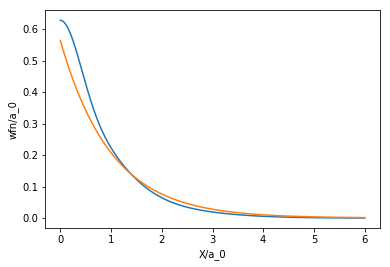

In [6]:
alpha_l = [3.42525091,0.62391373, 0.16885540]
c_l = [0.15432897,0.53532814, 0.44463454]
r = np.linspace(0,6,1000)

sto_6G_c = [0.00916359628,0.04936149294,0.16853830490,0.37056279970,0.41649152980,0.13033408410]
sto_6G_alpha = [35.52322122,6.513143725,1.822142904,0.625955266,0.243076747,0.100112428]


def N(alpha,a,b,c):
    return (2/np.pi)**(0.75)*(2**(a+b+c)*alpha**((2*a+2*b+2*c+3.0)/4.0))/(factorial2(2*a-1)*factorial2(2*b-1)*factorial2(2*c-1))**(0.5)

def GTO(r,alpha,a,b,c):
    return N(alpha,a,b,c)*x**a*y**b*z**c*np.exp(-alpha*r**2)

def sto_xg(alpha_l,c_l):
    sto = 0.0
    for i in range(len(c_l)):
        sto += c_l[i]*GTO(r,alpha_l[i],0,0,0)
    return sto

def psi_H(r):
    return np.sqrt(1/np.pi)*np.exp(-r)




sto_3G = sto_xg(alpha_l,c_l)
sto_6G = sto_xg(sto_6G_alpha,sto_6G_c)
plt.plot(r,sto_3G)
plt.plot(r,psi_H(r))
plt.xlabel("X/a_0")
plt.ylabel("wfn/a_0")
plt.show()

Las bases STO-3X es una llamada base mínima en el sentido que contiene las funciones justas y necesarias 
para describir la densidad de cada átomo que forman las moleculas. Sin embargo en general las energía calculadas utilizando bases mínimas en calculos moleculares son bastante pobres. Aún así esta base fue extremadamente 
popular en los años 50 y 60 debido a los relativamente buenos resultatdos cualitativos que entrega. El problema sin embargo de estas bases minimas es que no describen muy bien la realidad molecular aun cuando describen relativamente bien la densidad de los átomos aislados. 

Es por eso que pronto los pioneros se dieron cuenta que es más conveniente construir bases atómicas utilizando otros tipos de contracciones. Usemos el ejemplo de la base 4-31G para el átomo de H. Los coeficientes que dan la energía mínima de Hartree-Fock son:

\begin{equation}
\psi_{1s} = 0.5097g_{1s}(0.123317,r) + 0.47449g_{1s}(0.453757,r)+0.013424g_{1s}(2.01330,r) +0.01906g_{1s}(13.3615,r)
\end{equation}

Ahora yo podria simplemente dejar esta función así y usarla en un calculo molecular de por ejemplo H2O como mi función base del hidrógeno. Sin embargo los pioneros se dieron cuneta que al solamente contraer tres funciones 
gaussianas y dejar la última primitiva sola sin contraer se podian obtener resultados moleculares mucho mejores. 

\begin{equation}
\phi_1 = N*[0.47449g_{1s}(0.453757,r)+0.013424g_{1s}(2.01330,r) +0.01906g_{1s}(13.3615,r)\\
\phi_2 = g_{1s}(0.123317,r) 
\end{equation}

Los mejores resultados se obtenian al dejar la función más difusa sin contraer.
Estos set de bases se denominan **doble zeta** por razones obvias.

## Ejercicio:

Grafíque las dos funciones del set de base 4-31G que es un split valence shell basis set. 

In [1]:
N = 1.722350313

Se dice que la contracción es (4s)/[2s] es decir cuatro primitavas gaussianas fueron contraidas para formar dos funciones base 1s. La misma base para el átomo de oxygen donde tengo un set de primitavas Gaussianas (9s5p) 
que son contraidas a [3s,2p]  ( una función s para los orbitales core y dos funciones s y p para los orbitales 
de valencia. La función 2s esta se forma al contraer las dos gaussianas más difusas, mientras que la función 1s 
se forma con las 6 restantes. La función que se deja sin contraer es la función que aporta simultaneamente a al orbital 1s y al orbtial  2s en el calculo HF atómico. Esta contracción reduce el número de funciones base de 24 a 9. La diferencia en energía entre el set contraido y el set completo es solamente 0.007%.

En resumen, las ventajas del set de base double zeta son, mayor felxibilidad al describir el entorono molecular. Al tener una función de base más difusa y una menos 
difusa en el set de base estas permite la expansión o contracción de la función base, dependiendo de el entorno molecular que se quiere modelar. 


## Funciones de Polarización

Uno podría seguir mejorando la base agregando más gaussianas de zeta distinto (triple zeta, quadruple zeta, etc.), sin embargo al hacer eso se obtiene un set de base no balanceado. El próxima paso a mejorar funciones 
base es agregar las llamadas funciones de polarización, que son funciones de mayor momento angular que las funciones de valencia. Son nececarias, ya que el entorno molecular polariza la densidad electrónica por lo que requiro funciones de otra simetría para describir la anisotropía causada por la polarización.
En las bases de pople las funciones de polarización se denominan con un asterisco: e.g. 6-31G\* que es igual a
6-31G(d).   